In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dtypes = train.dtypes
nnull = train.isna().sum()
nunique = train.nunique()

desc = pd.DataFrame([dtypes, nnull, nunique], columns = train.columns, index = ['dtype', 'null', 'unique'])
desc

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
dtype,int64,int64,int64,object,object,float64,int64,int64,object,float64,object,object
null,0,0,0,0,0,177,0,0,0,0,687,2
unique,891,2,3,891,2,88,7,7,681,248,147,3


In [5]:
train_copy = train.copy()
train_copy.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
train_copy.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


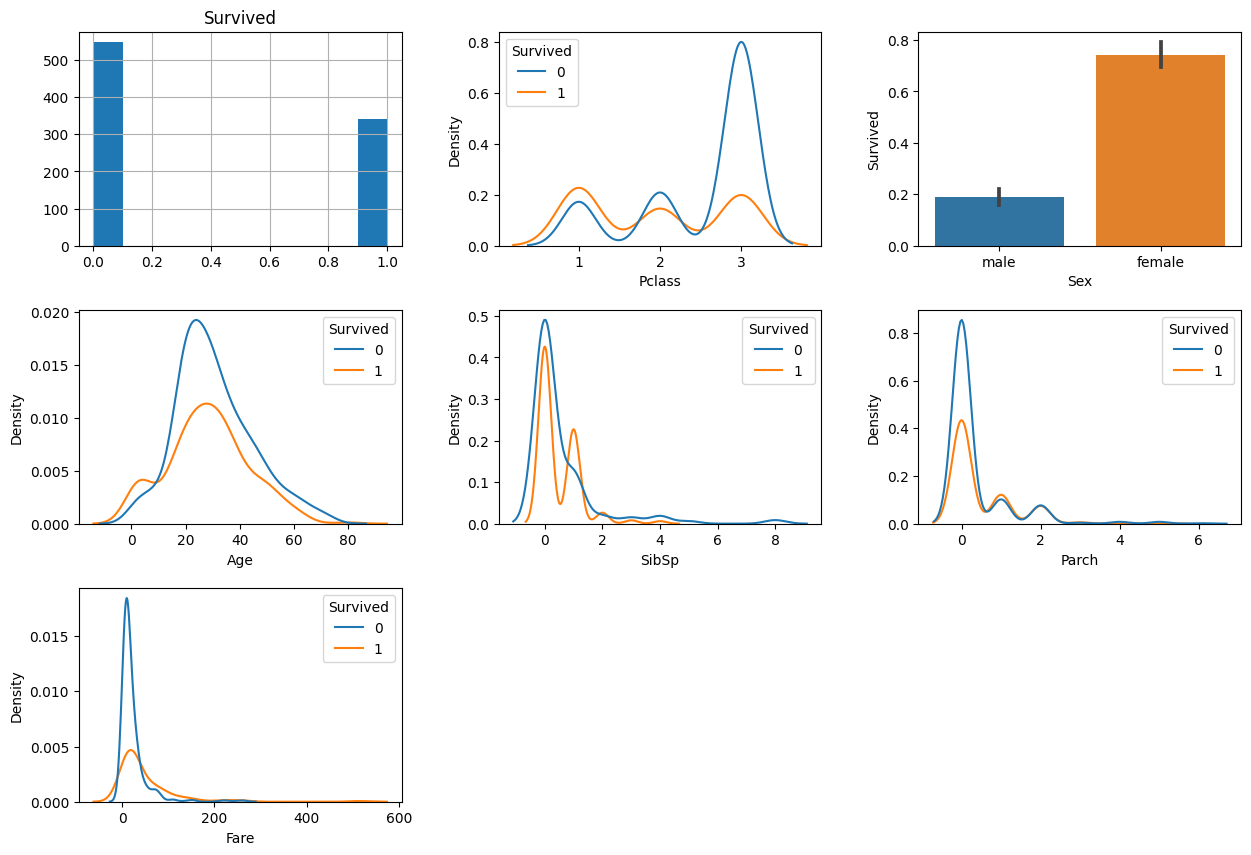

In [6]:
fig, axes = plt.subplots(3, 3, figsize = (15,10))

for i, ax in enumerate(axes.flatten()[:7]):
    col = train_copy.columns[i]
    if col == 'Survived':
        train_copy.hist(column = col, ax = ax)
    elif col in train_copy.select_dtypes(exclude = 'object'):
        sns.kdeplot(data = train[~train[col].isna()], x = col, hue = 'Survived', ax= ax)
    else:
        sns.barplot(data = train[~train[col].isna()], x = col, y = 'Survived', ax = ax)
 
axes[2, 1].set_visible(False) 
axes[2, 2].set_visible(False)

In [7]:
train_copy[(train_copy['Sex'] == 'female') & (train_copy['Age'].isna())]['Age'] = train_copy[(train_copy['Sex'] == 'female') & (~train_copy['Age'].isna())]['Age'].mean()
train_copy[(train_copy['Sex'] == 'male') & (train_copy['Age'].isna())]['Age'] = train_copy[(train_copy['Sex'] == 'male') & (~train_copy['Age'].isna())]['Age'].mean()

In [8]:
train_copy = train_copy.dropna()
train_copy

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [9]:
train_copy = pd.get_dummies(train_copy, dtype = int)
train_copy

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,1,0,0,1,0
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [10]:
x_train = train_copy.drop(columns = ['Survived'])
y_train = train_copy['Survived']

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [12]:
rf = RandomForestClassifier()
grid_params = {'n_estimators':[10,50,100,150,200], 'max_depth':[2,3,5,7,9], 'criterion':['gini', 'entroy']}
grid = GridSearchCV(rf, grid_params, cv = 3)
grid.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entroy'],
                         'max_depth': [2, 3, 5, 7, 9],
                         'n_estimators': [10, 50, 100, 150, 200]})

In [13]:
model = grid.best_estimator_

In [14]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [15]:
test_copy = test.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'])
test_copy['Age'][(test_copy['Sex'] == 'female') & (test_copy['Age'].isna())] = test_copy[(test_copy['Sex'] == 'female') & (~test_copy['Age'].isna())]['Age'].mean()
test_copy['Age'][(test_copy['Sex'] == 'male') & (test_copy['Age'].isna())] = test_copy[(test_copy['Sex'] == 'male') & (~test_copy['Age'].isna())]['Age'].mean()
test_copy[test_copy['Embarked'].isna()]['Embarked'] = test_copy['Embarked'].mode()
test_copy['Fare'][test_copy['Fare'].isna()] = test_copy['Fare'].mean()
test_copy = pd.get_dummies(test_copy, dtype = int)
test_copy

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.500000,0,0,7.8292,0,1,0,1,0
1,3,47.000000,1,0,7.0000,1,0,0,0,1
2,2,62.000000,0,0,9.6875,0,1,0,1,0
3,3,27.000000,0,0,8.6625,0,1,0,0,1
4,3,22.000000,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,30.272732,0,0,8.0500,0,1,0,0,1
414,1,39.000000,0,0,108.9000,1,0,1,0,0
415,3,38.500000,0,0,7.2500,0,1,0,0,1
416,3,30.272732,0,0,8.0500,0,1,0,0,1


In [16]:
pred = model.predict(test_copy)

In [17]:
y_test = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy_score(pred, y_test['Survived'])

0.8277511961722488

In [20]:
y_test.to_csv('submission.csv', index=False)